In [1]:
import torch
from functions.train_test import test
from models.vit import ViT
from models.CNN_ViT import CNN_ViT
from functions.helpers import count_parameters
from functions.plotter import plot_feature_maps, plot_loss_accuracy
import functions as f


In [2]:
torch.manual_seed(42)

CIFAR-100


In [3]:
train_loader, test_loader = f.data_loader.get_data_loader(
    80, 2, "datasets/cifar-100/cifar-100-python", download=True
)

Files already downloaded and verified
Files already downloaded and verified


CNN+ViT

Total parameters:671396
Test Accuracy: 54.01%


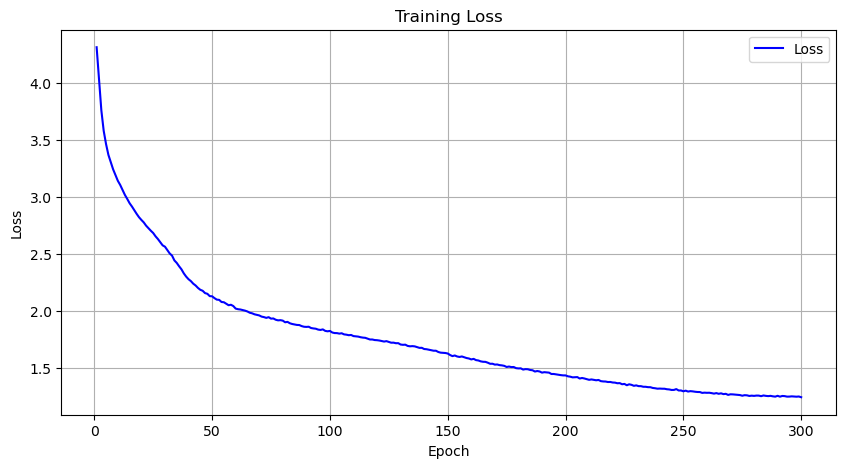

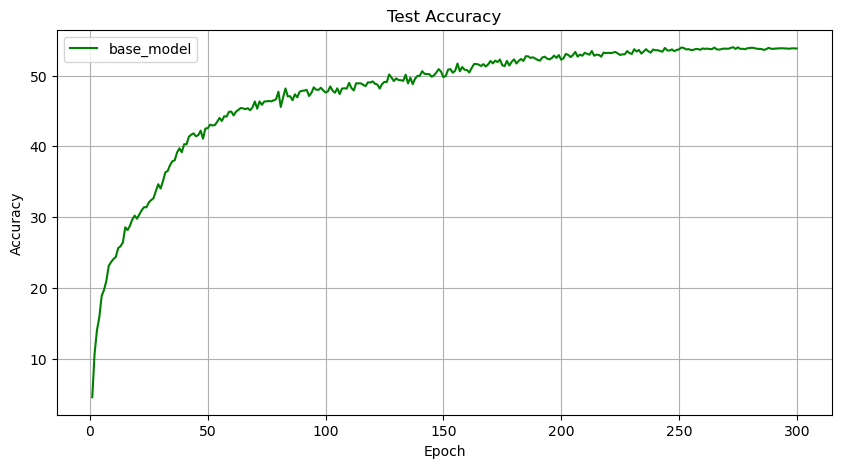

In [4]:
base_model = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=4,
    heads=8,
    mlp_dim=256,
    dropout=0.1,
).to("cpu") #cpu for feature visualisation
base_model_load_path = f"save_model/cifar-100/vit_base/best_model.pt"
print(f"Total parameters:{f.helpers.count_parameters(base_model)}")
f.data_loader.load_checkpoint(base_model,base_model_load_path)
base_model_acc=test(base_model,test_loader,'cuda')
base_model_loss_list,base_model_accuracy_list=f.data_loader.load_lists_from_file('save_model/cifar-100/vit_base/loss_and_accuracy')
f.plotter.plot_loss_accuracy(base_model_loss_list,base_model_accuracy_list,'base_model')

Total parameters:246404


Test Accuracy: 58.13%


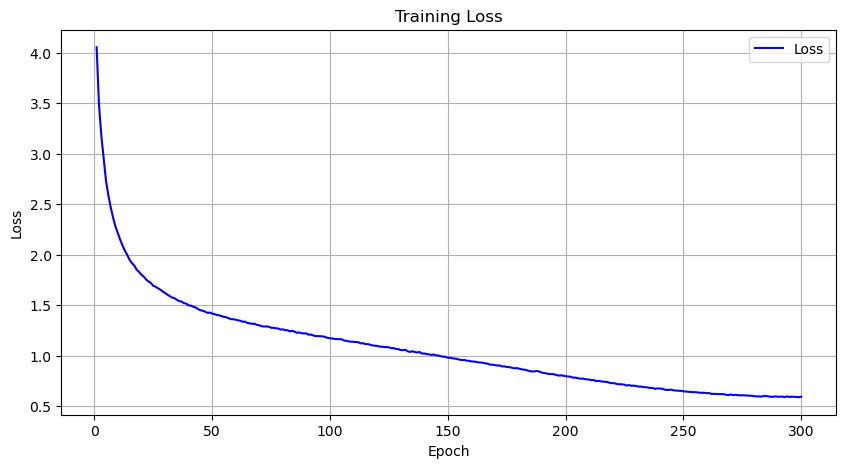

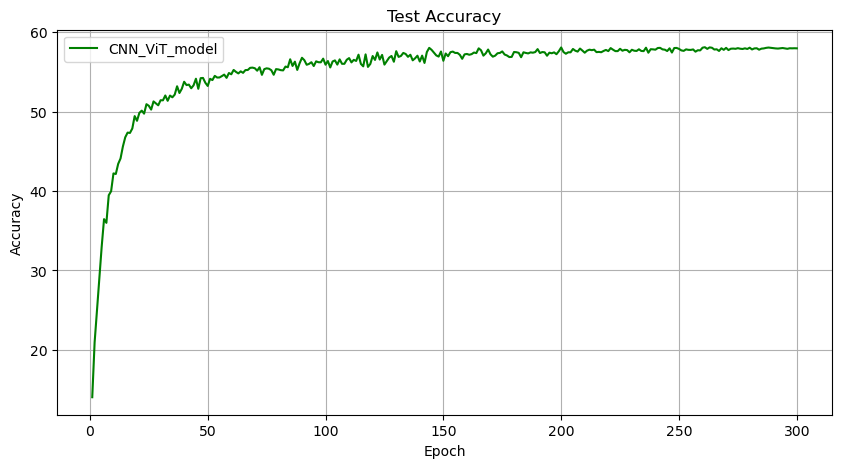

In [13]:
CNN_ViT_model = CNN_ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=2,
    heads=4,
    mlp_dim=256,
    dropout=0.1,
).to("cpu")#cpu for feature visualisation
CNN_ViT_model_load_path = "save_model/cifar-100/CNN_ViT2/best_model.pt"
print(f"Total parameters:{f.helpers.count_parameters(CNN_ViT_model)}")
f.data_loader.load_checkpoint(CNN_ViT_model,CNN_ViT_model_load_path)
CNN_ViT_model_acc=test(CNN_ViT_model,test_loader,'cuda')
CNN_ViT_model_loss_list,CNN_ViT_model_accuracy_list=f.data_loader.load_lists_from_file('save_model/cifar-100/CNN_ViT2/loss_and_accuracy')
f.plotter.plot_loss_accuracy(CNN_ViT_model_loss_list,CNN_ViT_model_accuracy_list,'CNN_ViT_model')

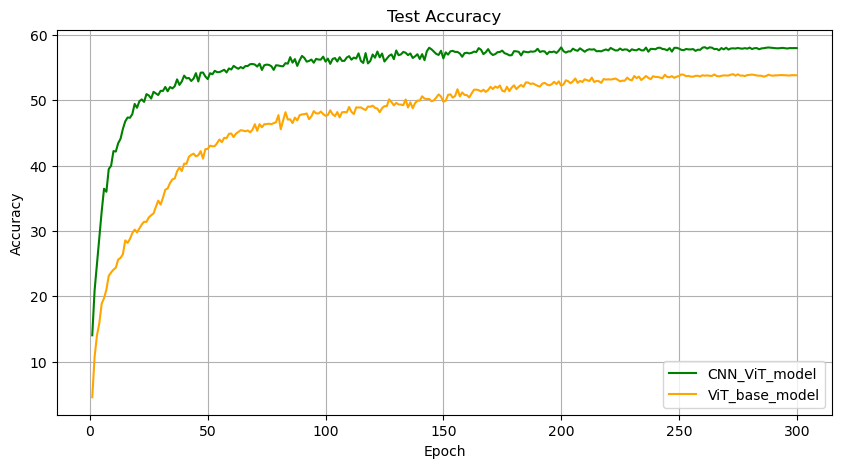

In [14]:
f.plotter.plot_accuracy_comparison(CNN_ViT_model_accuracy_list,base_model_accuracy_list,'CNN_ViT_model','ViT_base_model')

In [6]:
f.data_loader.create_comparison_table([base_model,CNN_ViT_model],[base_model_acc,CNN_ViT_model_acc])

,model_name,num_params,accuracy,depth,num_heads,num_cnn_layers
1,CNN_ViT,246404,58.13,2,4,3
0,ViT,671396,54.01,4,8,0


Files already downloaded and verified
Files already downloaded and verified


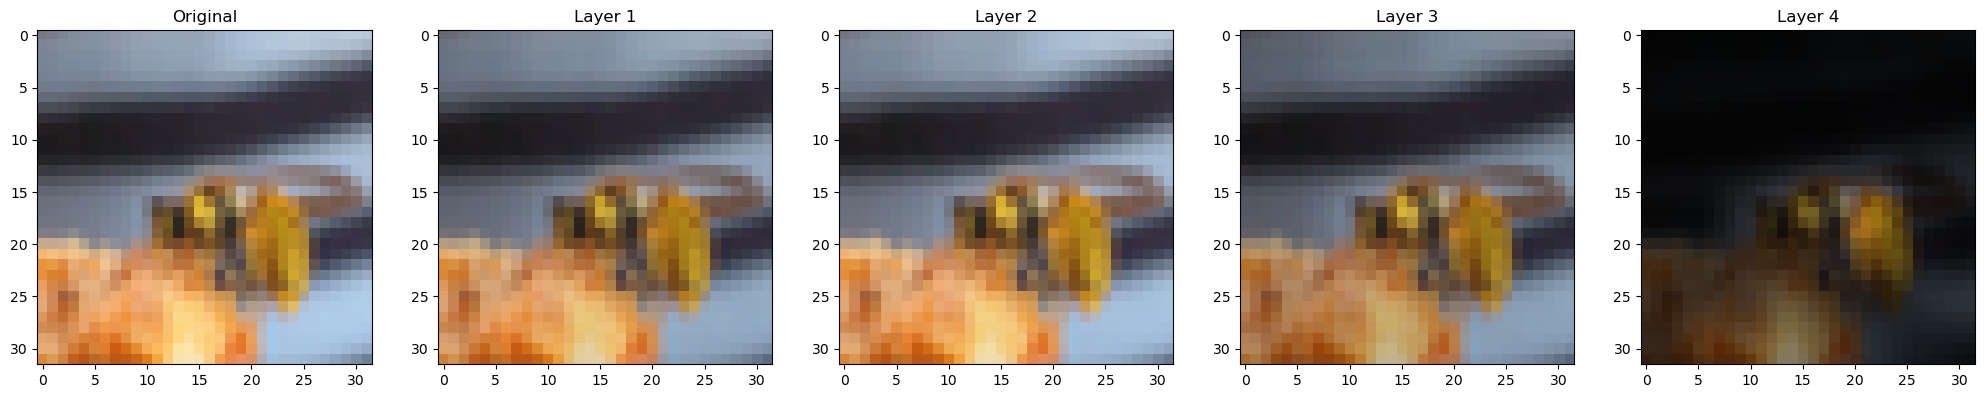

In [7]:
base_model.to('cpu')
x,img=f.data_loader.get_random_image('bee')
plot_feature_maps(base_model,x,img,device='cpu')

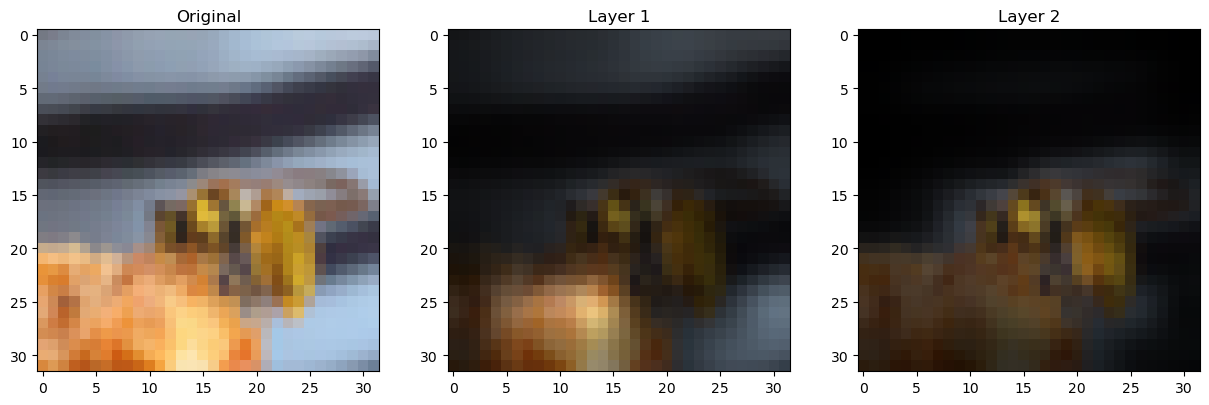

In [11]:
CNN_ViT_model.to('cpu')
plot_feature_maps(CNN_ViT_model,x,img,device='cpu')